In [2]:
par_num = 50000
core_num = 10
# core_list = ['01', '02', '04', '08', '10', '20', '30', '40', '50', '60']
core_list = ['62']
# core_list = ['70','80', '90']
testType = 'TestWeak'
for core_num in core_list:
    if testType == 'TestStrong':
        par_num = 50000# * int(core_num)
    if testType == 'TestWeak':
        par_num = 5000 * int(core_num)
    fname = 'job-scal-' + str(par_num) +'-' + str(core_num)
    fo = open(fname, "w+")
    fo.close()
    fo = open(fname, "a")
    fo.write("#!/bin/bash\n")
    fo.write("#SBATCH -N 1\n")
    fo.write("#SBATCH -C knl\n")
    fo.write("#SBATCH -q debug\n")
    fo.write("#SBATCH -J mpitest\n")
    fo.write("#SBATCH --ntasks-per-node="+str(core_num)+"\n")
    fo.write("#SBATCH -t 00:30:00\n")

    fo.write("#modules\n")
    fo.write("module load openmpi\n")

    fo.write("#run the application:\n")
    fo.write("for seed in 10\n")
    fo.write("do\n")
    fo.write("    for par_num in "+ str(par_num) +"\n")
    fo.write("    do\n")
    fo.write("        srun ../mpi -s $seed -n $par_num > ./out/"+testType+"."+str(core_num)+"."+str(par_num) +".out\n")
    fo.write("    done\n")
    fo.write("done\n")
    fo.close()

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

def Least_squares(x,y):
    x_ = x.mean()
    y_ = y.mean()
    m = np.zeros(1)
    n = np.zeros(1)
    k = np.zeros(1)
    p = np.zeros(1)
    for i in np.arange(x.shape[0]):
        k = (x[i]-x_)* (y[i]-y_)
        m += k
        p = np.square( x[i]-x_ )
        n = n + p
    a = m/n
    b = y_ - a* x_
    return a,b

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [5]:
def drawResult(X,xname,Y,yname,ref = True):
    if ref:
        a,b = Least_squares(np.array(X),np.array(Y))
        Yref = a * X + b
#         plt.plot(X,Yref, '-o')
    plt.figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

    plt.plot(X,Y, '-o')            
#     plt.title('Serial time Curve')

    plt.xlabel(xname)
    plt.ylabel(yname)

In [6]:
def showResult(testType = "TestStrong"):
    print(testType)
    direc = './out/'
    fnames = os.listdir(direc)
    file_to_objects = {}
    Npart = []
    Ncore = []
    Times = []
    fnames.sort()
    for filename in fnames:
        if filename.endswith(".out"):
            if filename.startswith(testType):
                info = filename.split('.')
                Ncore.append(int(info[1]))
                inputHandler = open(direc+filename, "r")
                listOfLines = inputHandler.readlines()
                inputHandler.close()
                for line in listOfLines:
                    if line.startswith('Simulation Time'):
                        line = line.split(' ')
                        Times.append(float(line[3]))
                        Npart.append(int(line[6]))
                        

    return Ncore, Npart, Times


Test2
[256] [1000, 2000, 4000, 8000, 16000, 32000] [0.284932, 0.547772, 1.07338, 2.12734, 4.22737, 9.27534]


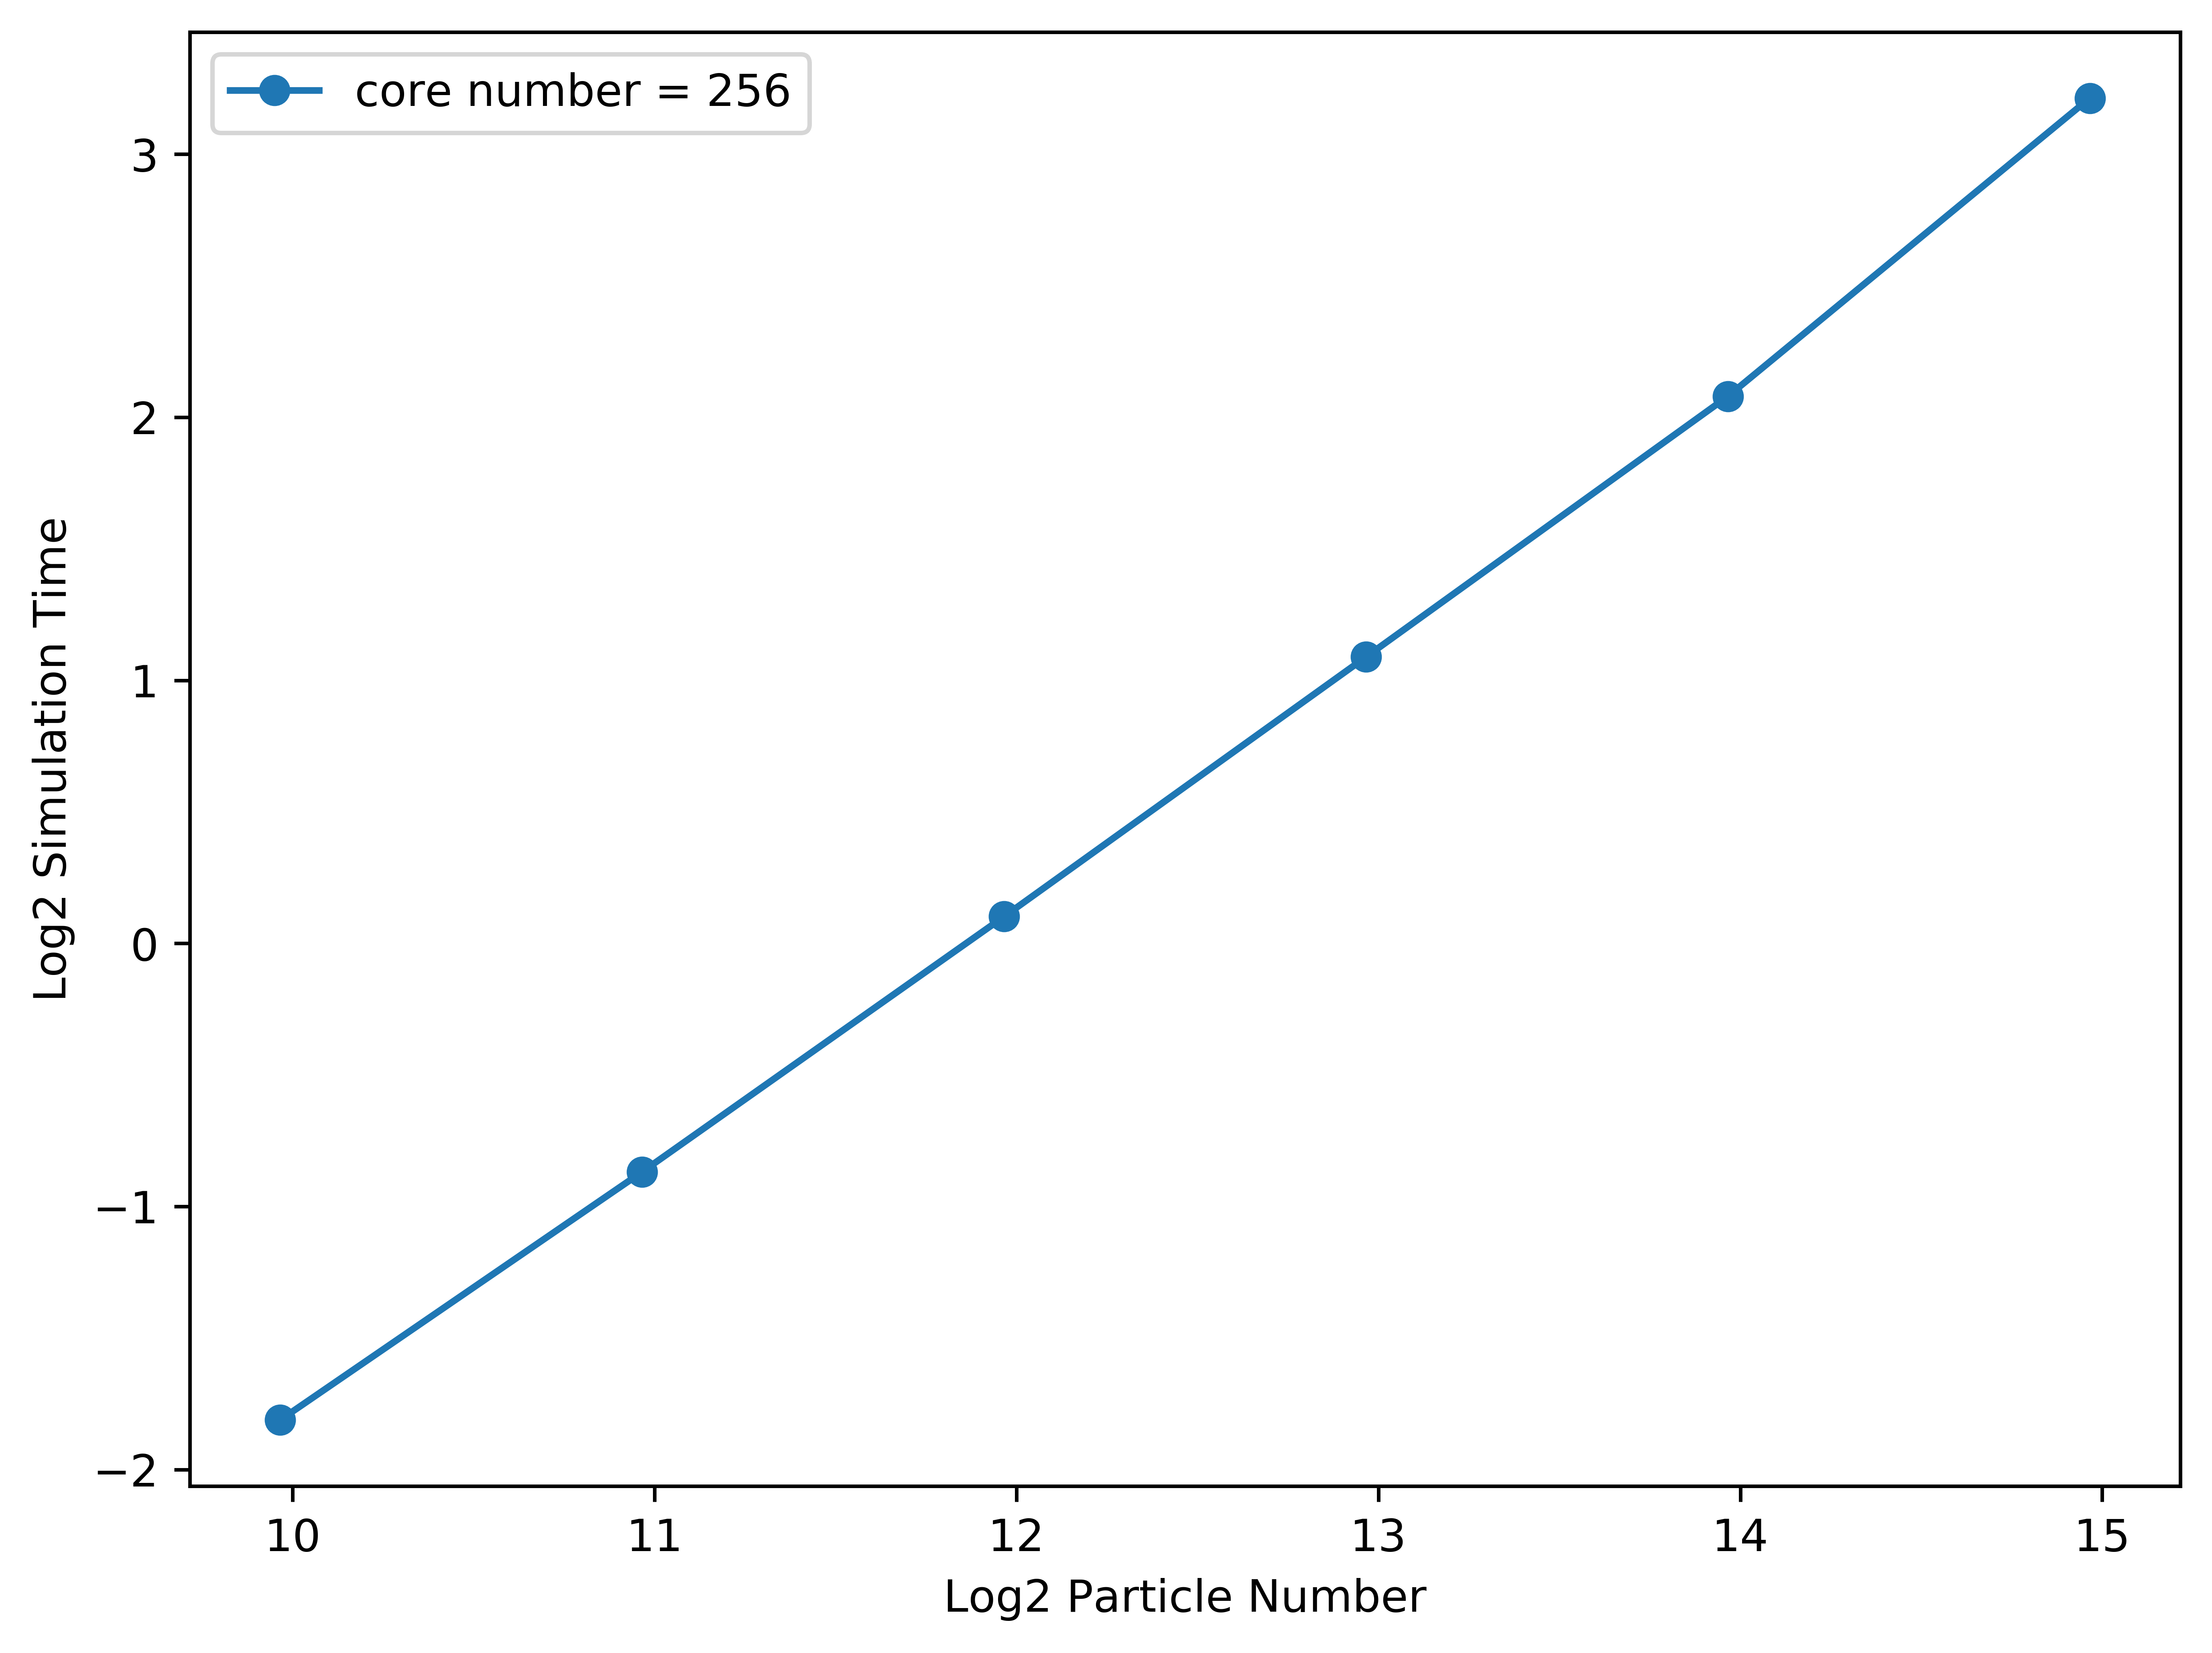

In [8]:
# Log - Log Naive
Ncore,Npart,Times = showResult("Test2")
print(Ncore,Npart,Times)
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)
plt.legend(['core number = %d'%(Ncore[0])], loc='upper left')
plt.show()

Test2
[256] [1000, 2000, 4000, 8000, 16000, 32000] [0.30576, 0.924747, 1.32771, 2.14382, 4.30218, 10.2628]


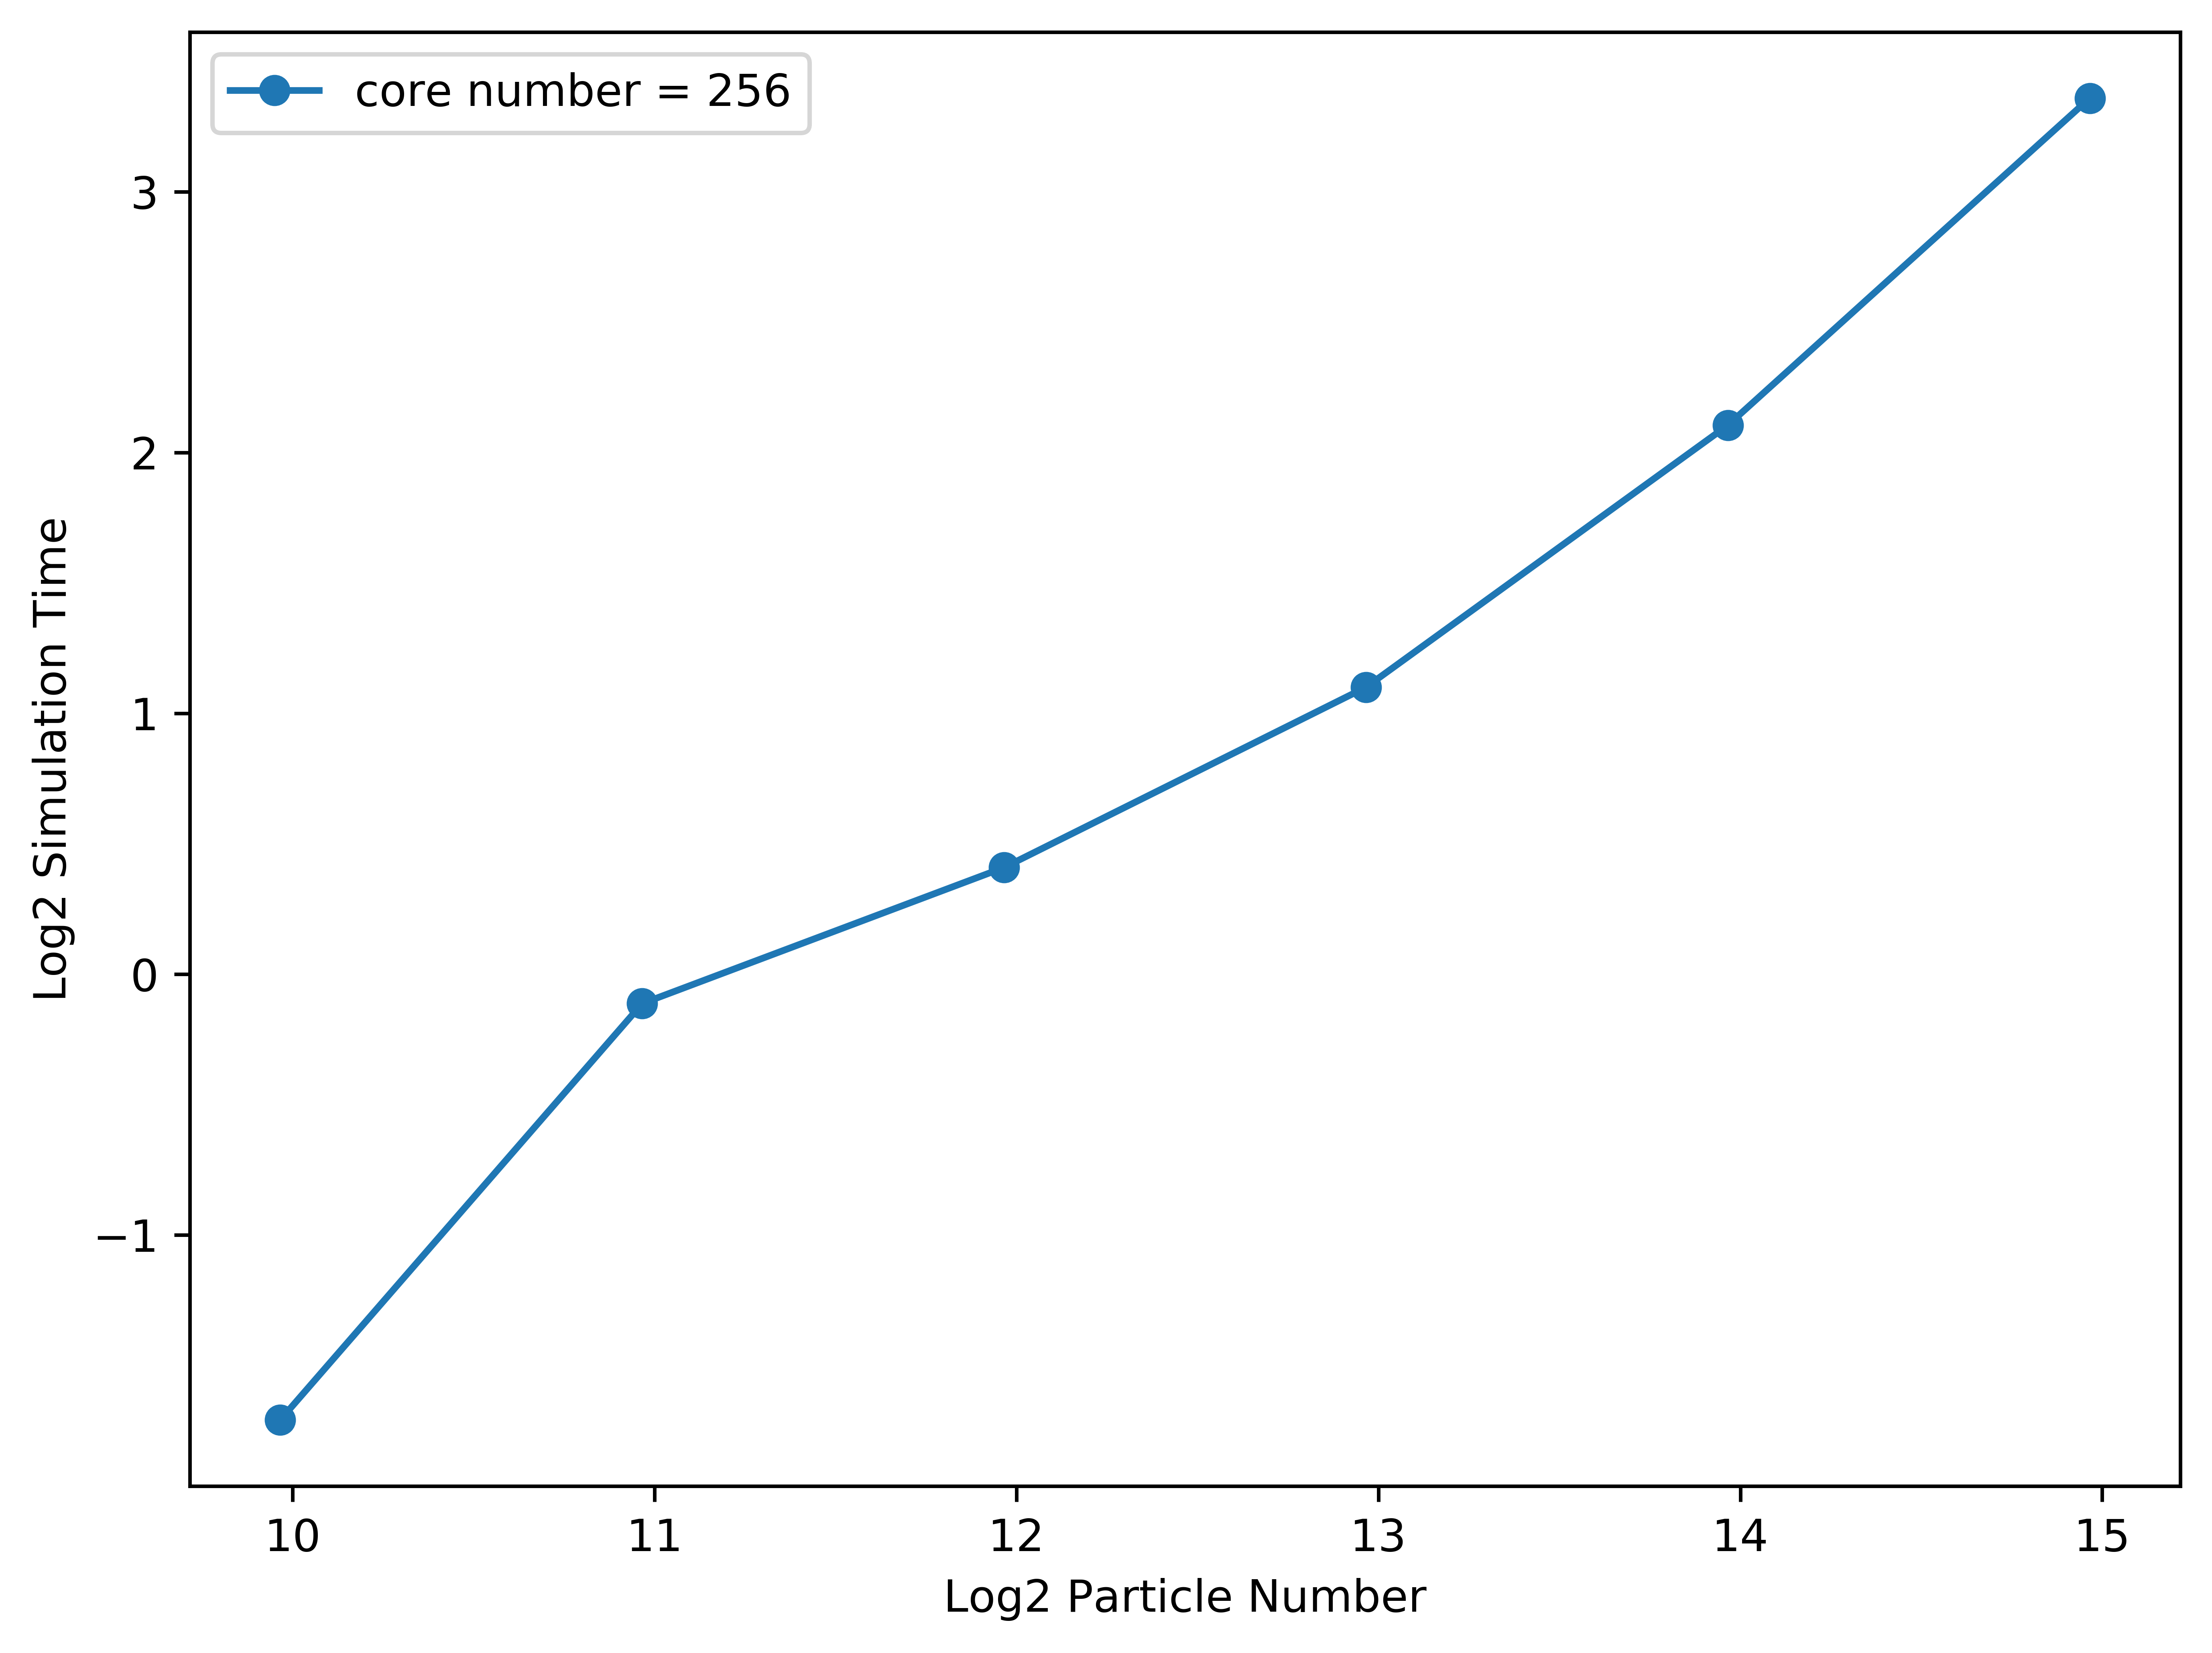

In [9]:
# Log - Log mine
Ncore,Npart,Times = showResult("Test2")
print(Ncore,Npart,Times)
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)
plt.legend(['core number = %d'%(Ncore[0])], loc='upper left')
plt.show()

TestStrong


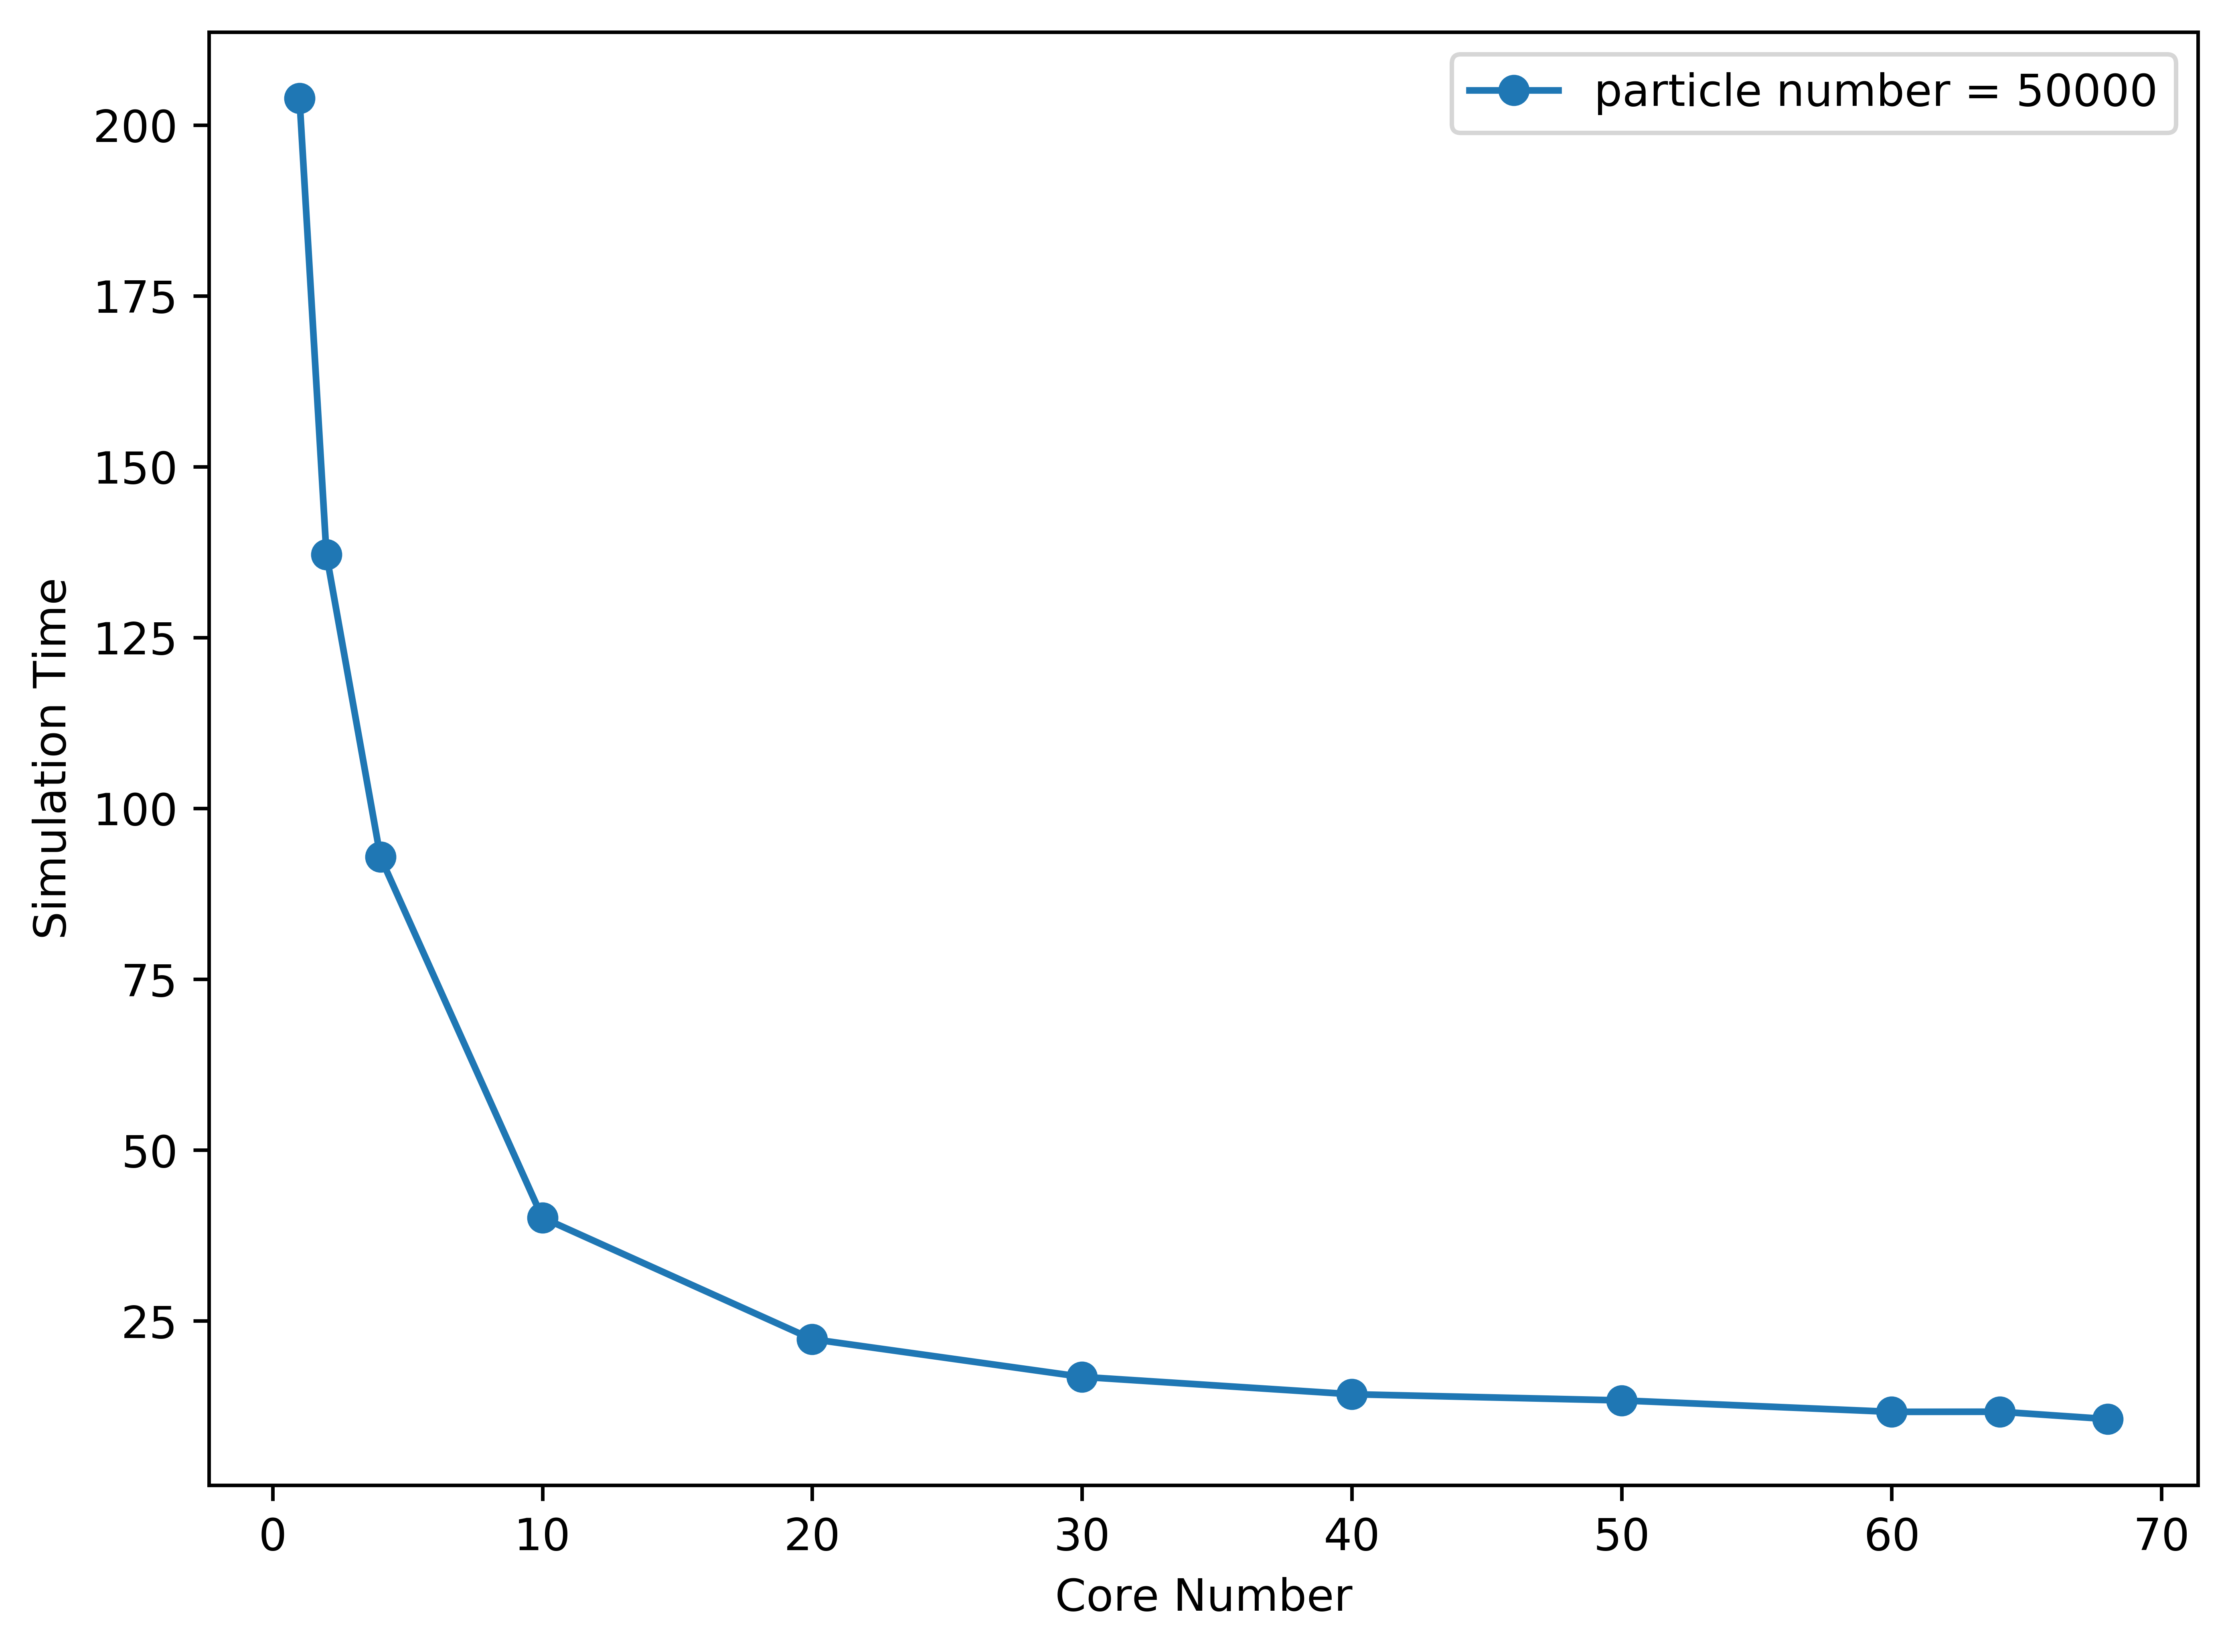

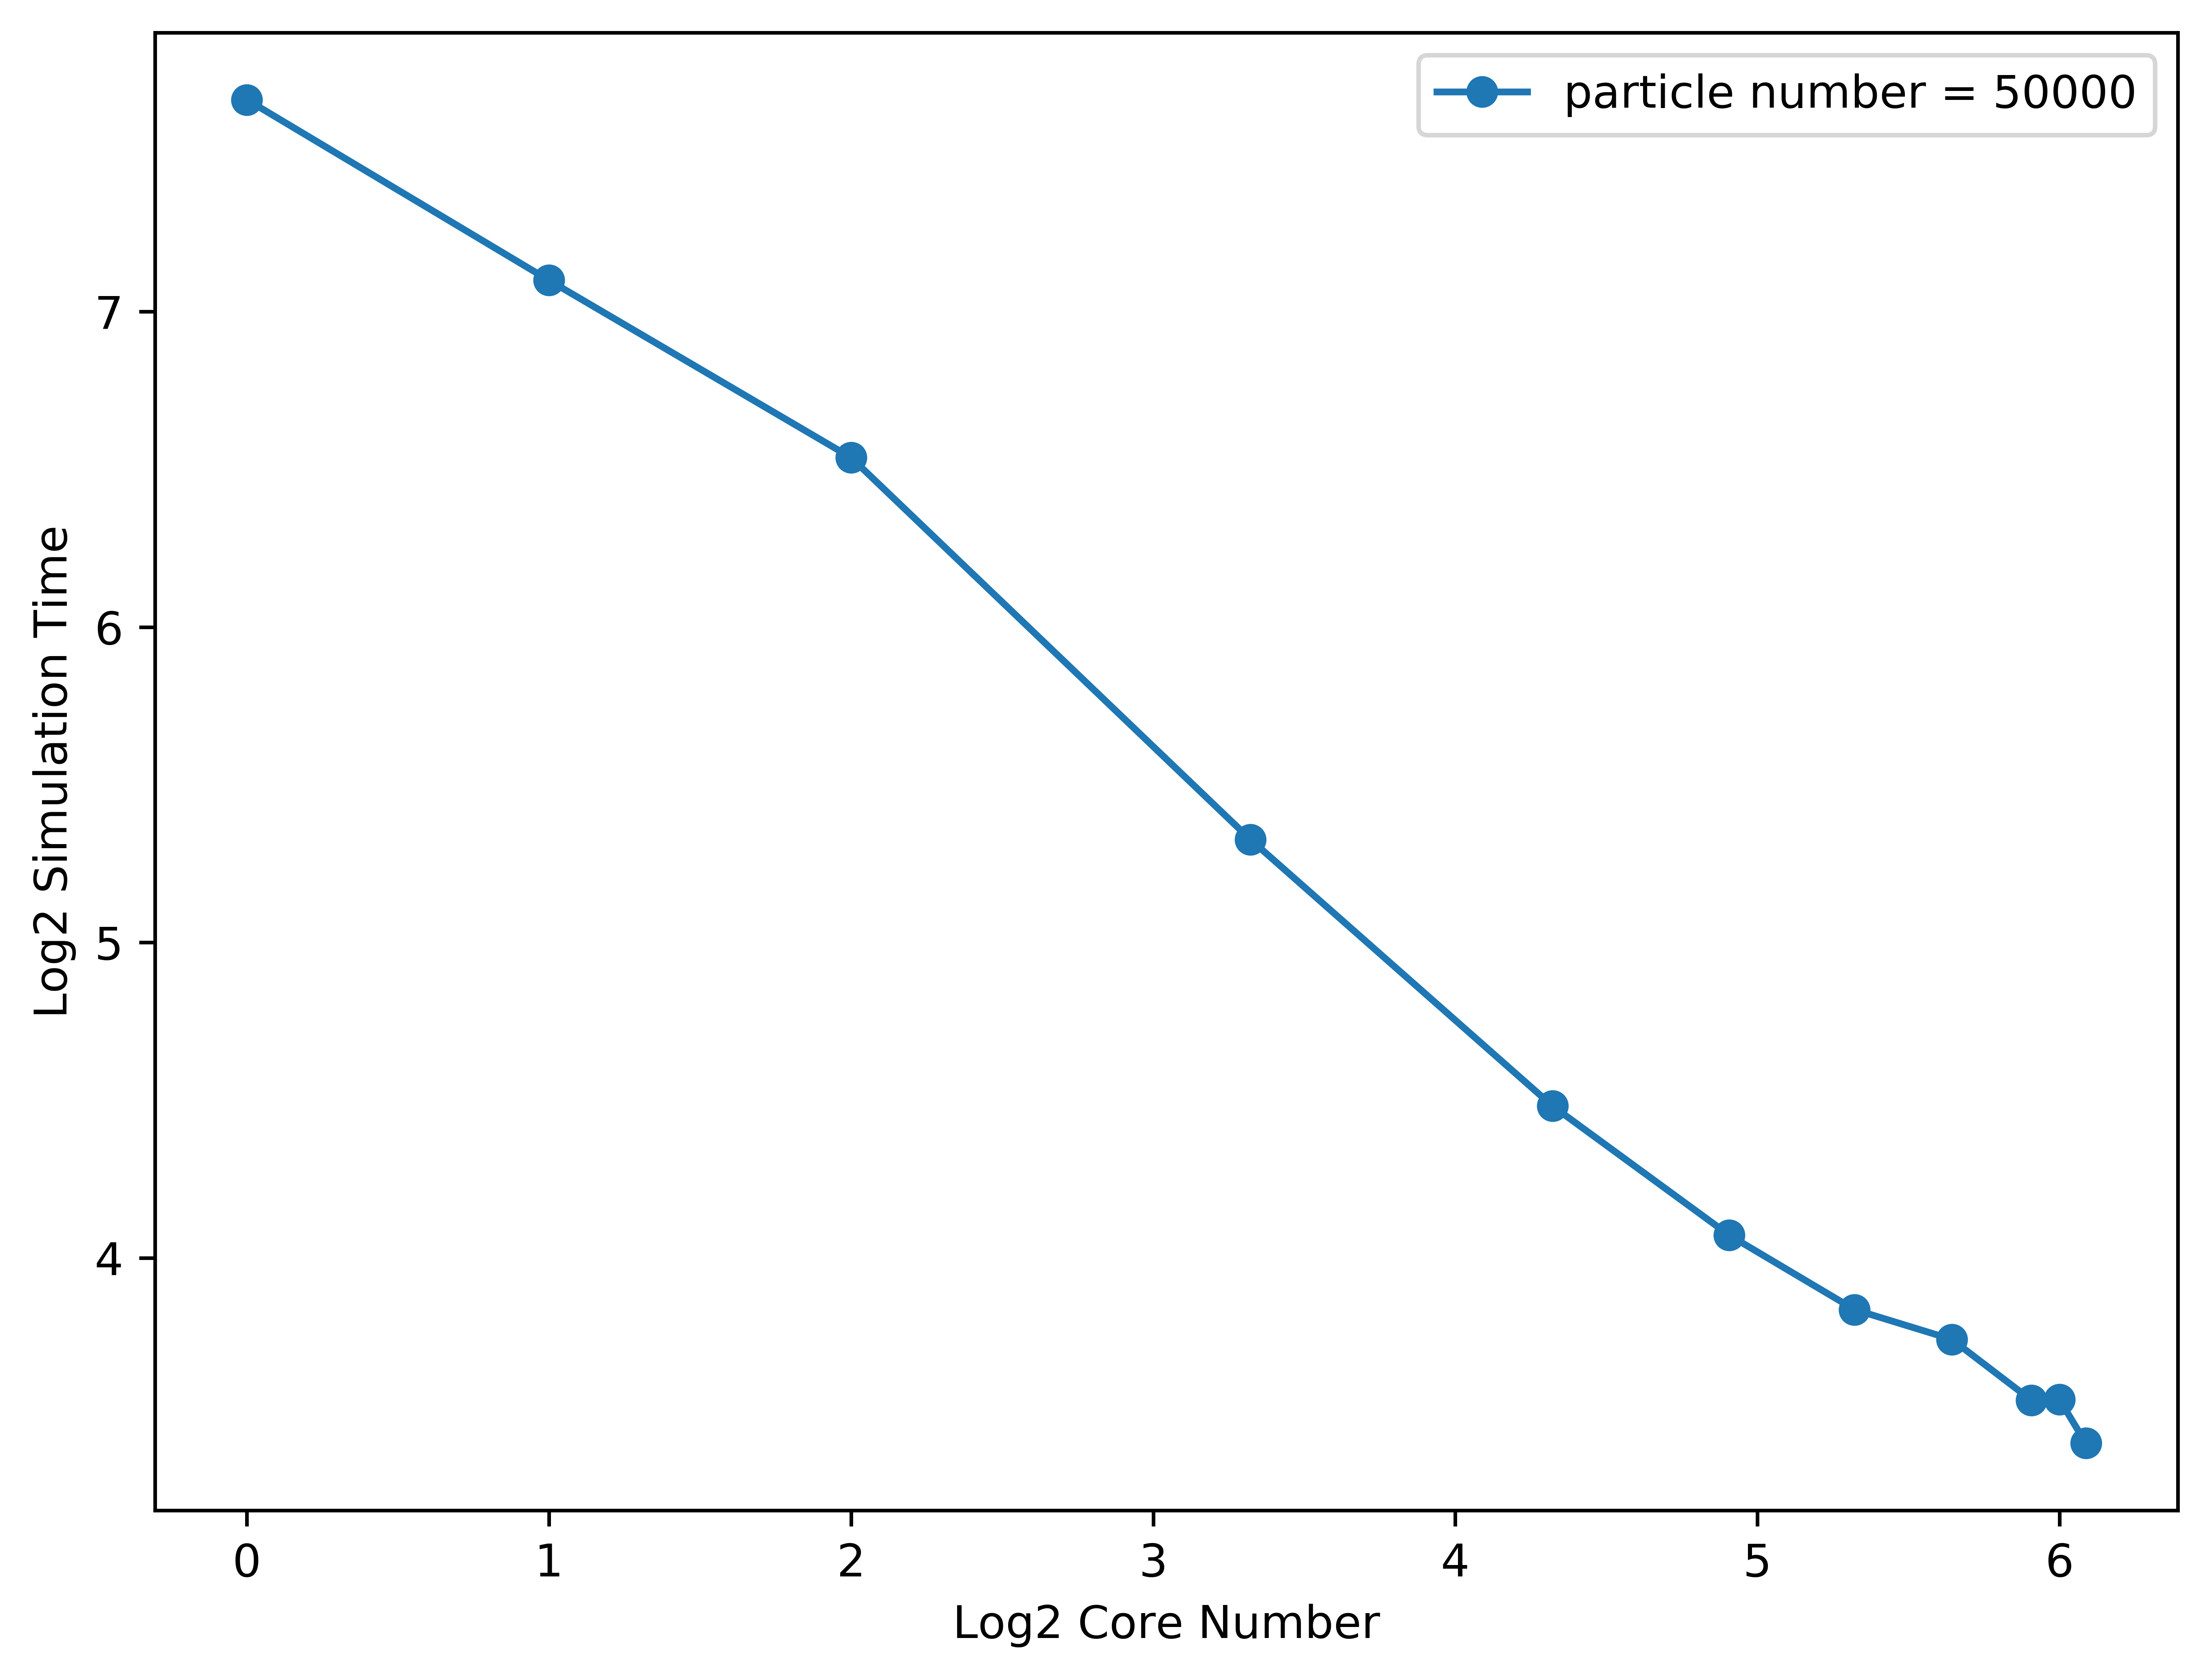

In [5]:
# Strong Scaling
Ncore,Npart,Times = showResult("TestStrong")

drawResult(Ncore,'Core Number',Times,'Simulation Time', False)
plt.legend(['particle number = %d'%(Npart[0])], loc='upper right')
plt.show()

inverseCoreNum = []
for c in Ncore:
    inverseCoreNum.append(np.log2(c))
    
drawResult(inverseCoreNum,'Log2 Core Number',np.log2(Times),'Log2 Simulation Time', False)
plt.legend(['particle number = %d'%(Npart[0])], loc='upper right')
plt.show()

TestWeak
[1, 2, 4, 10, 20, 30, 40, 50, 60, 64, 68, 70, 80, 90] [5000, 10000, 20000, 50000, 100000, 150000, 200000, 250000, 300000, 320000, 340000, 350000, 400000, 450000] [18.0494, 25.8194, 36.432, 40.2316, 45.6623, 51.1768, 58.2245, 63.8875, 74.4195, 71.9971, 74.2886, 92.242, 98.7425, 107.124]


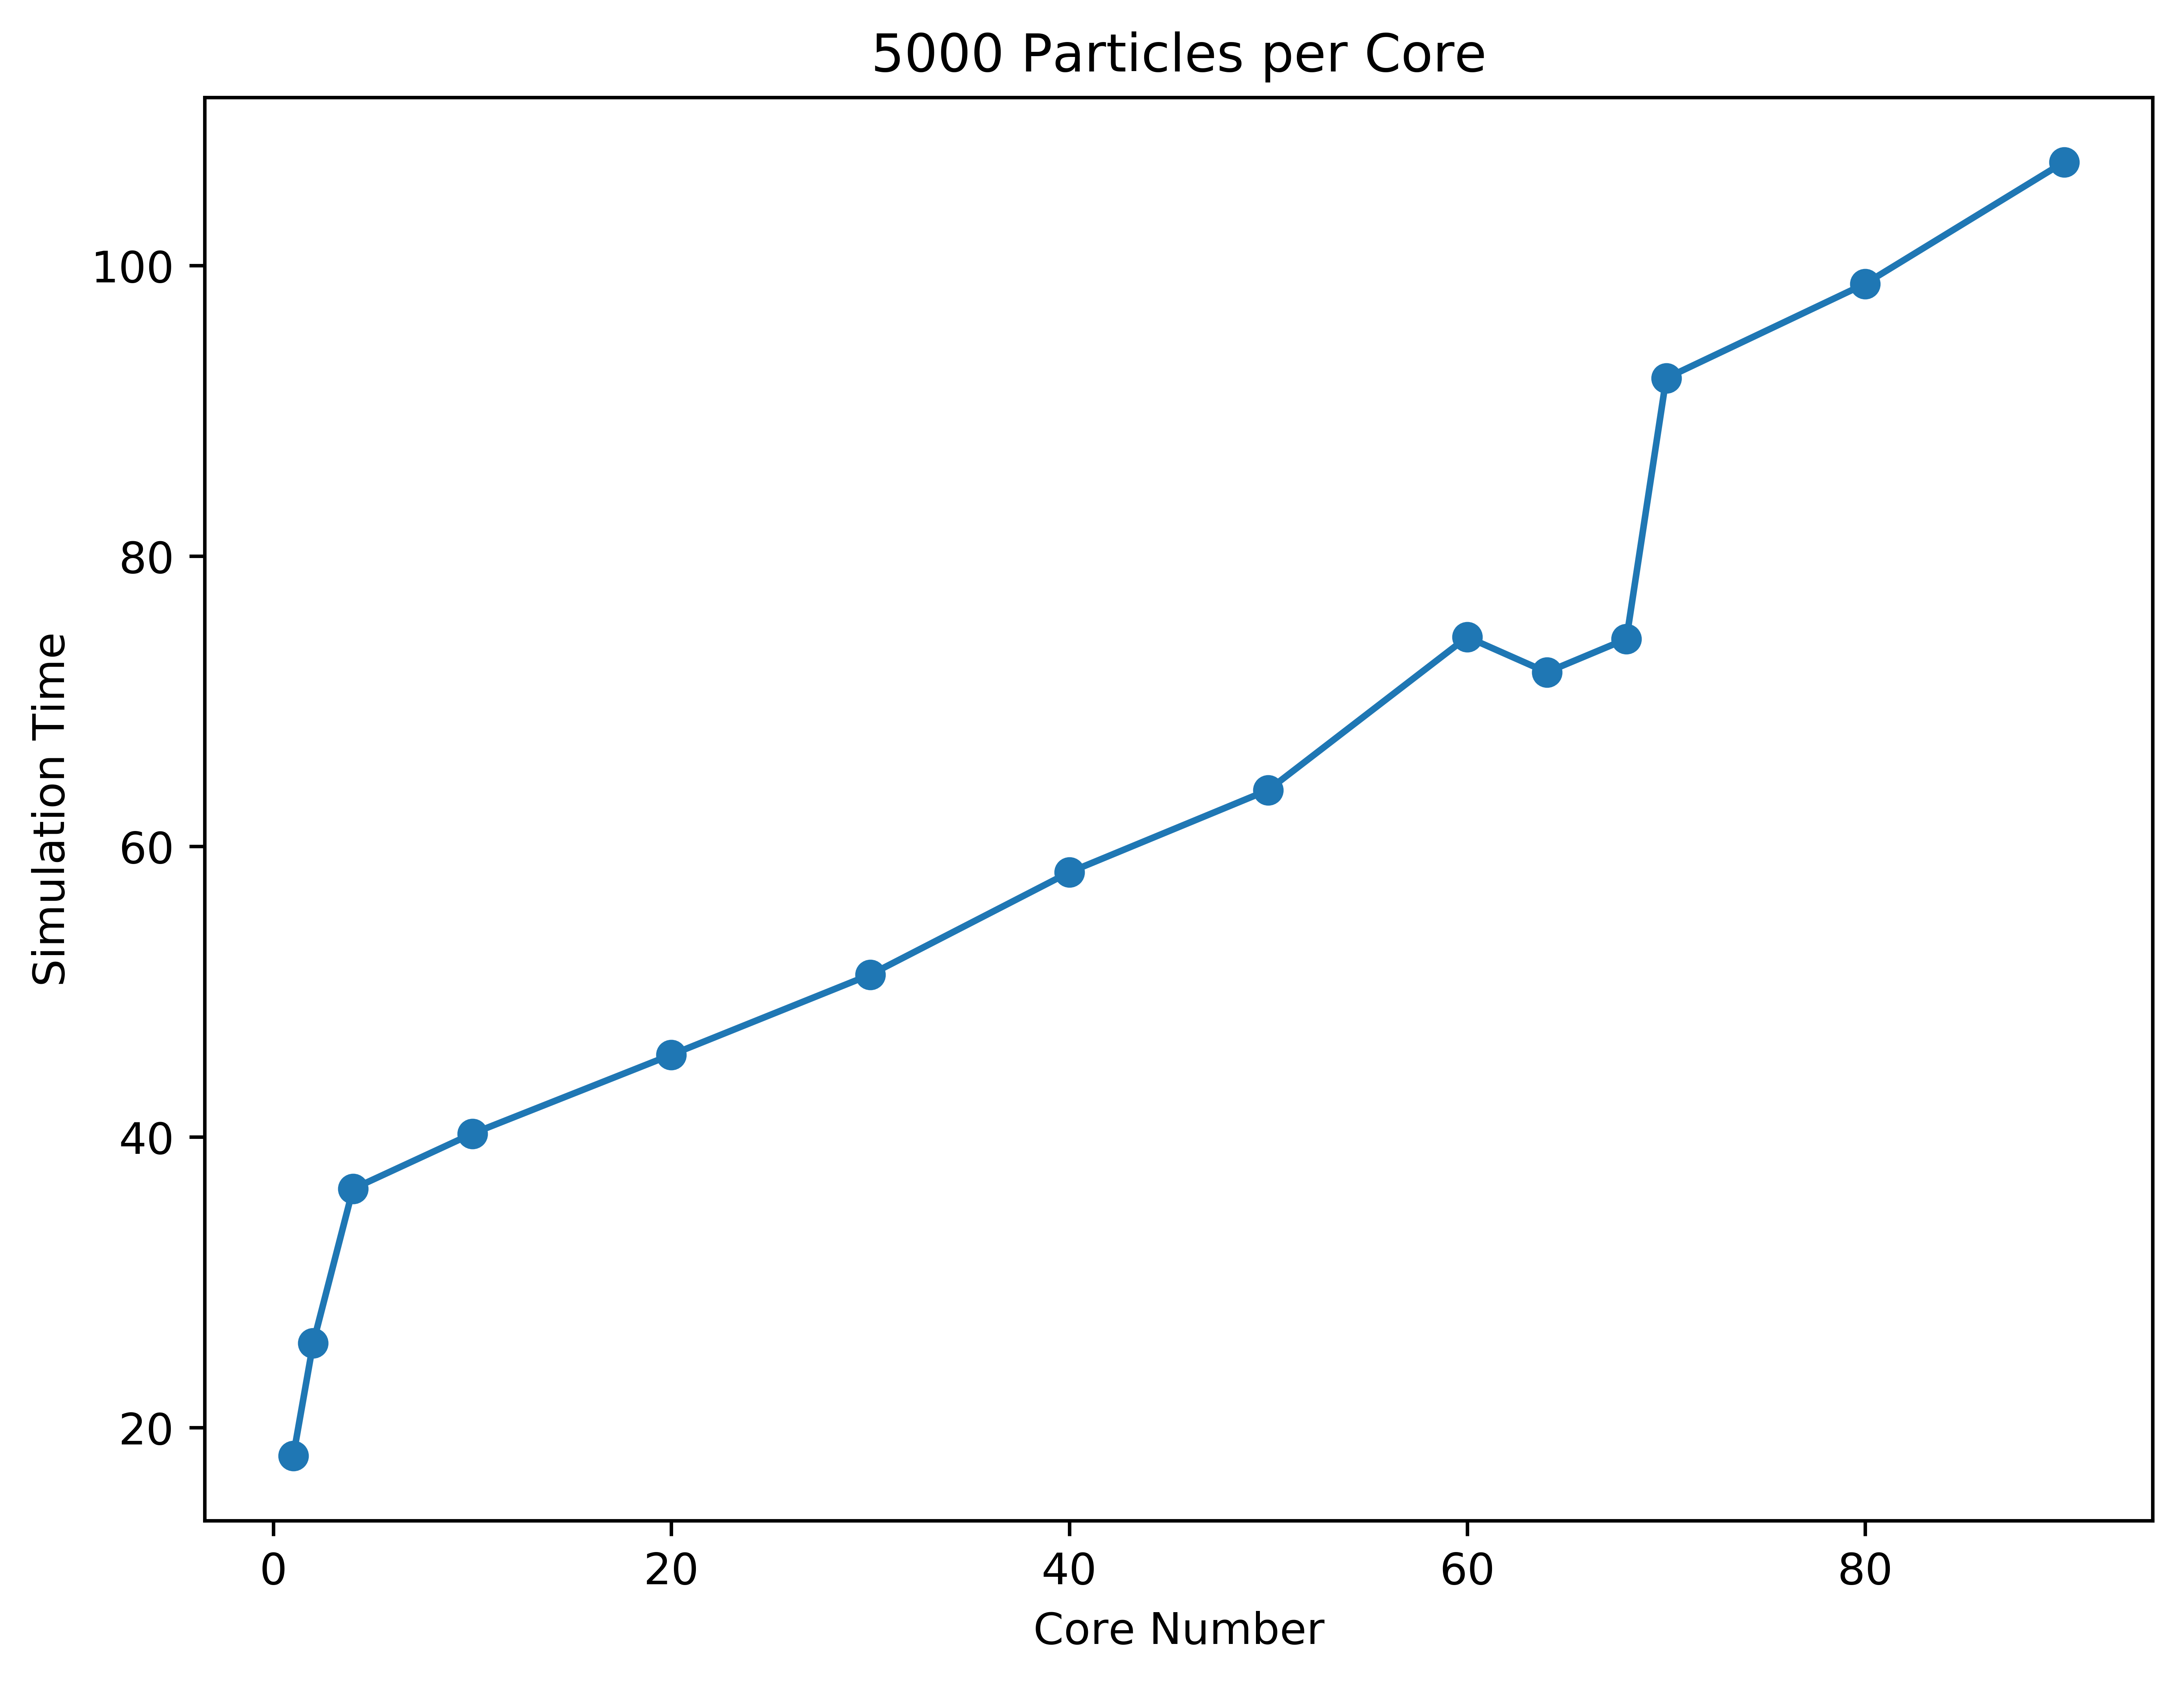

In [6]:
# Weak Scaling
Ncore,Npart,Times = showResult("TestWeak")
print(Ncore,Npart,Times)
drawResult(Ncore,'Core Number',Times,'Simulation Time', False)
plt.title("5000 Particles per Core")
plt.show()


TestStrong
[1, 2, 4, 10, 20, 30, 40, 50, 60, 64, 68] [50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000] [203.956, 137.137, 92.8889, 40.1258, 22.3387, 16.817, 14.2791, 13.3728, 11.703, 11.7196, 10.6471]


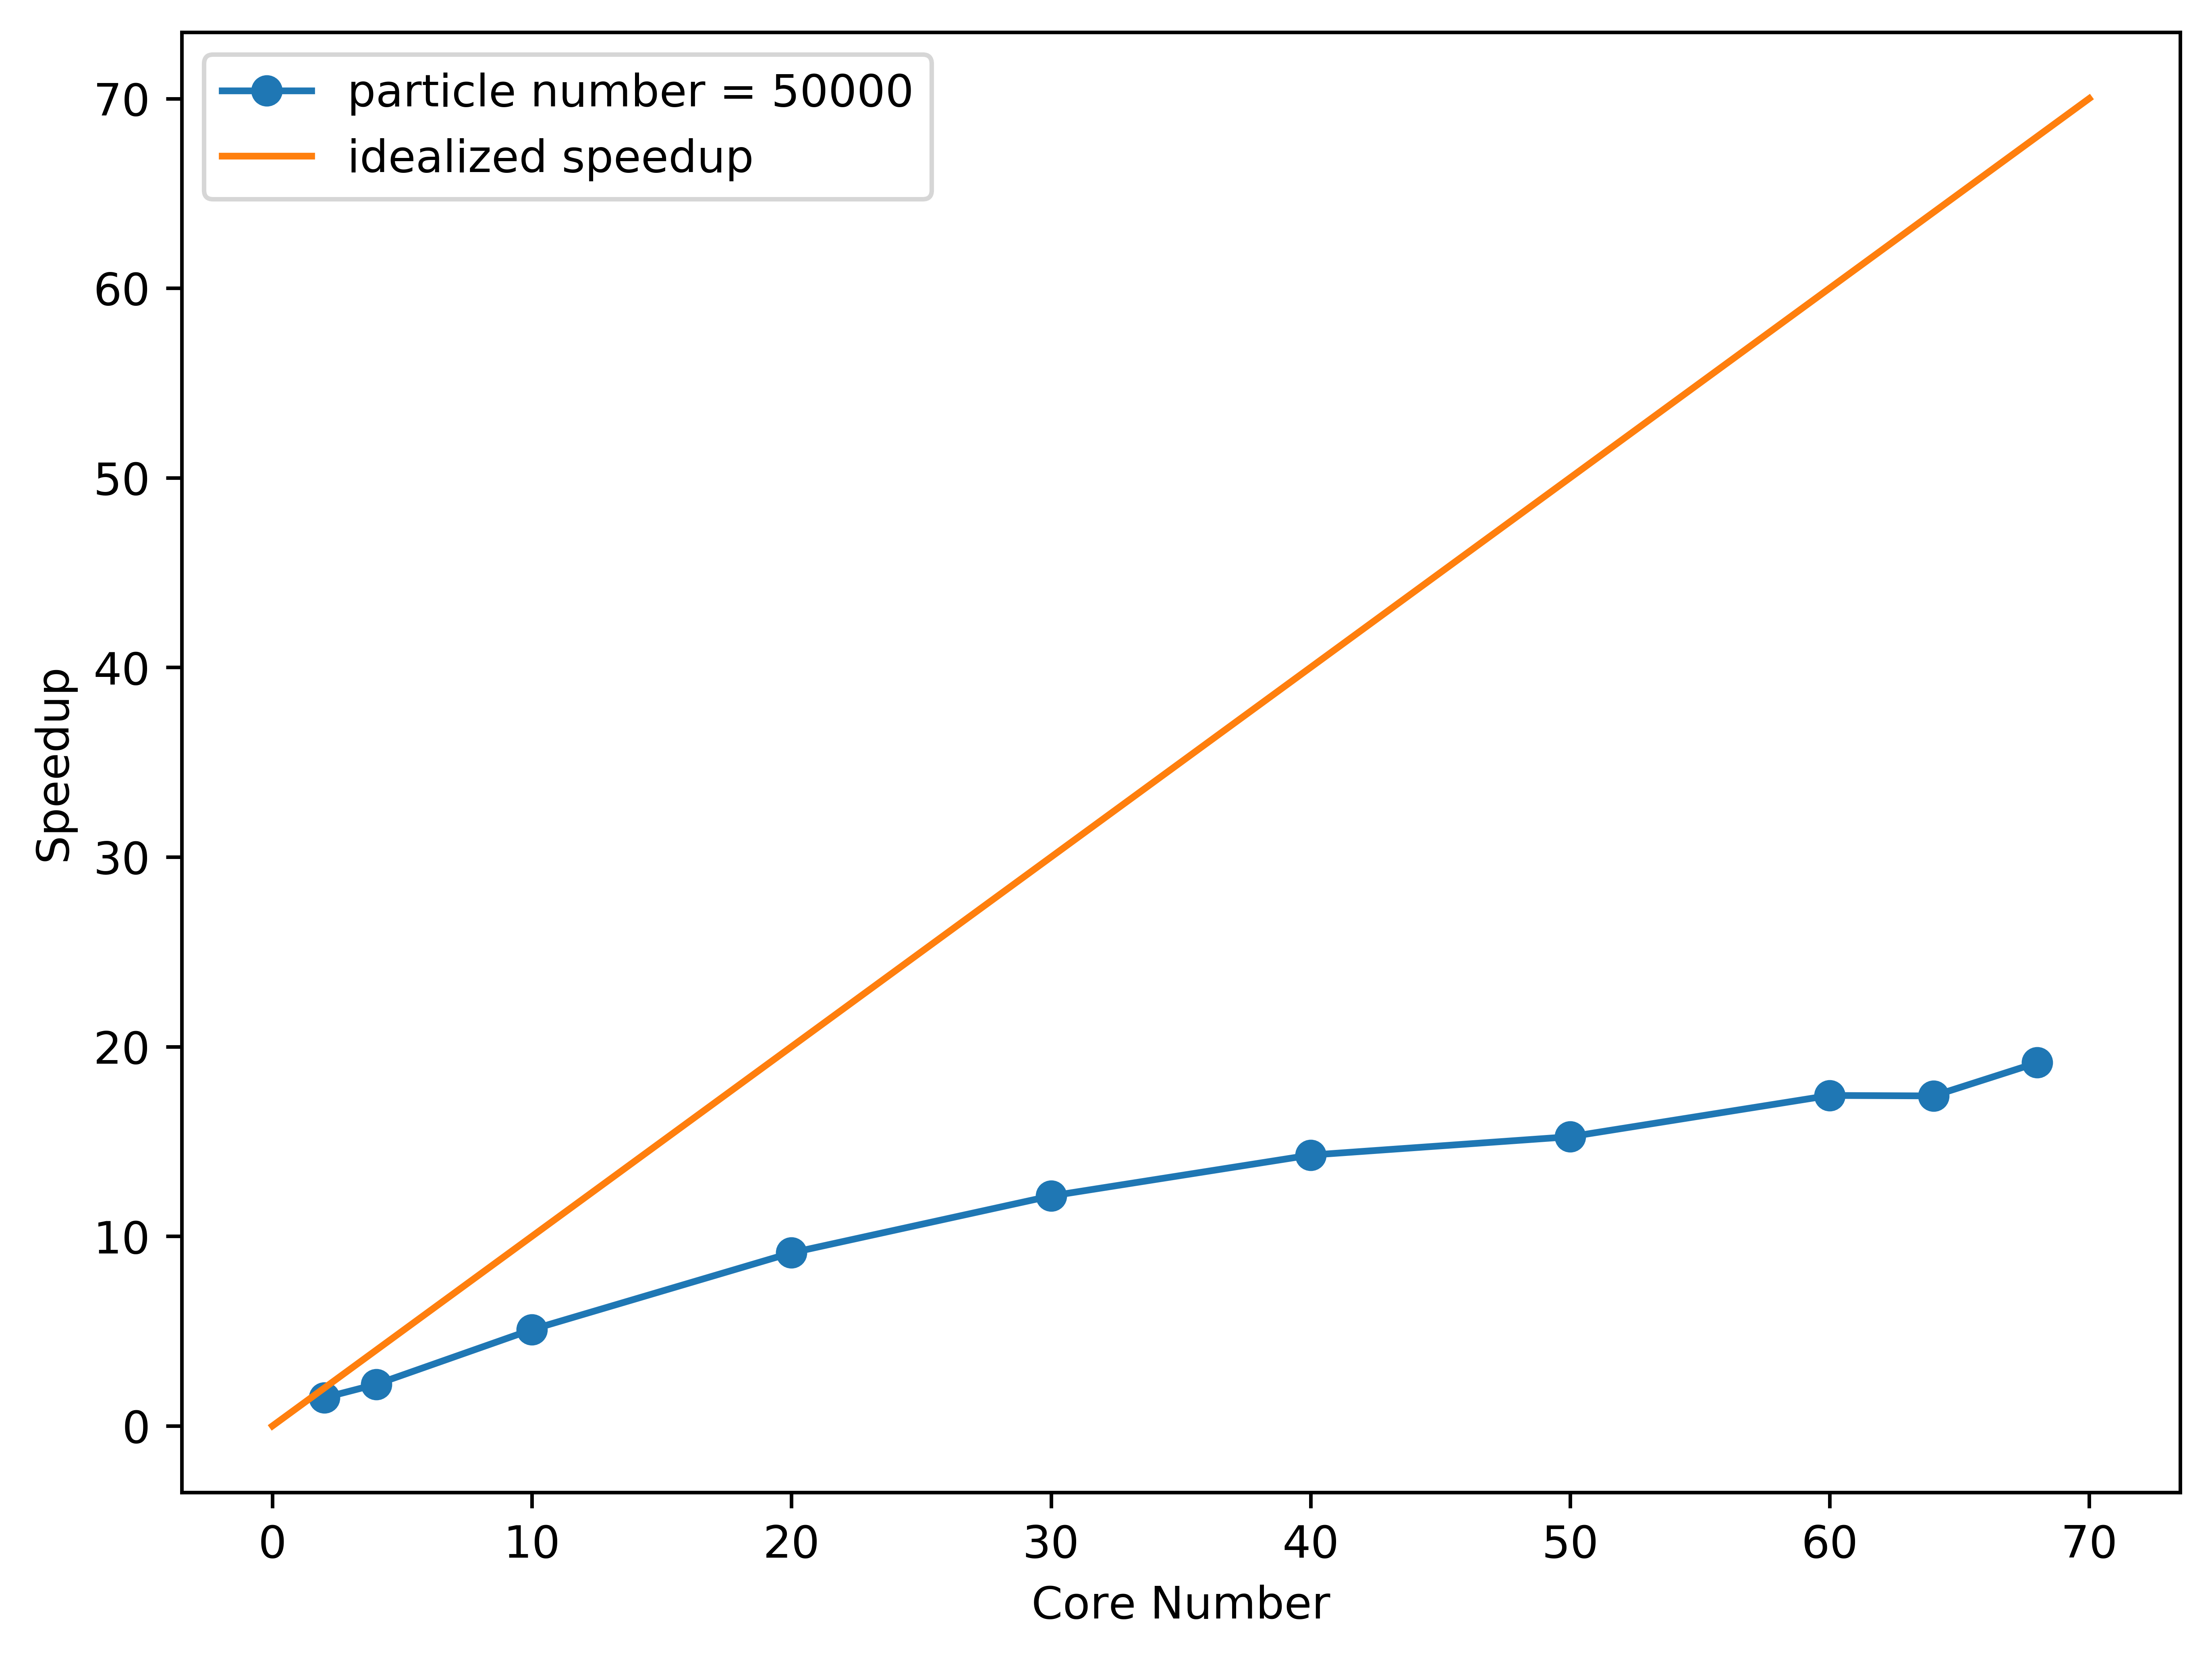

2  & 137.14s & 1.49x & 74.0\% \\
4  & 92.89s & 2.2x & 55.0\% \\
10  & 40.13s & 5.08x & 51.0\% \\
20  & 22.34s & 9.13x & 46.0\% \\
30  & 16.82s & 12.13x & 40.0\% \\
40  & 14.28s & 14.28x & 36.0\% \\
50  & 13.37s & 15.25x & 31.0\% \\
60  & 11.7s & 17.43x & 29.0\% \\
64  & 11.72s & 17.4x & 27.0\% \\
68  & 10.65s & 19.16x & 28.0\% \\


In [7]:
Ncore,Npart,Times = showResult("TestStrong")
print(Ncore,Npart,Times)
Times = np.array(Times)
Speedup = Times[0] / Times[1:]
E = Speedup / Ncore[1:]
drawResult(Ncore[1:],'Core Number',Speedup,'Speedup', False)

x = np.linspace(0, 70, 1000)
plt.plot(x, x)
plt.legend(['particle number = %d'%(Npart[0]),'idealized speedup '], loc='upper left')
# Speedup plots that show how closely your OpenMP code approaches 
# the idealized p-times speedup and a discussion on whether it is possible to do better.
plt.show()
for i in range(Times.size - 1):
    print('{0}  & {1}s & {2}x & {3}\\% \\\\'.format(Ncore[i+1], round(Times[i+1],2),round(Speedup[i],2),(round(100*E[i],0))))
